In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Datasets/real_estate_dataset.csv')
dataset.head()

,Property Size (sqft),Number of Bedrooms,Number of Bathrooms,Construction Year,Furnished,Median Household Income,Unemployment Rate,Population Density,Nearby School Quality Score,Distance to City Center (km),Distance to Nearest Park (km),Air Quality Index,Public Transport Access,Regional Price Growth (%),Historical Price Volatility,Selling Price (in $)
0,1360,1,3,1962,NaN,86.20,7.57,581,Average,39.84,9.71,61.0,Low,-3.05,4.81,494261.876537
1,4272,4,1,1973,NaN,68.96,8.57,1831,Average,7.30,9.67,156.0,Low,13.39,2.24,846778.571205
2,3592,3,3,1989,NaN,90.29,3.40,8455,Poor,48.73,7.92,152.0,Medium,11.31,3.12,709567.908435
3,966,2,1,1963,Fully,75.21,7.22,856,Excellent,2.18,4.92,115.0,High,6.75,3.57,471644.670280
4,4926,1,1,2019,Fully,90.89,6.85,1079,Good,6.79,1.72,184.0,High,-2.39,5.77,898441.597224


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Property Size (sqft)           5000 non-null   int64  
 1   Number of Bedrooms             5000 non-null   int64  
 2   Number of Bathrooms            5000 non-null   int64  
 3   Construction Year              5000 non-null   int64  
 4   Furnished                      3524 non-null   object 
 5   Median Household Income        4750 non-null   float64
 6   Unemployment Rate              5000 non-null   float64
 7   Population Density             5000 non-null   int64  
 8   Nearby School Quality Score    4850 non-null   object 
 9   Distance to City Center (km)   5000 non-null   float64
 10  Distance to Nearest Park (km)  5000 non-null   float64
 11  Air Quality Index              4800 non-null   float64
 12  Public Transport Access        5000 non-null   o

In [4]:
# Furnished, Median Household Income, Nearby School Quality Score, Air Quality Index consists of null values
print(dataset['Furnished'].unique())
print(f"Nearby School Quality Score: {dataset['Nearby School Quality Score'].unique()}")

[nan 'Fully' 'Partially']
Nearby School Quality Score: ['Average' 'Poor' 'Excellent' 'Good' nan]


In [5]:
# Filling missing values with mean and mode
dataset['Furnished'] = dataset['Furnished'].fillna(dataset['Furnished'].mode()[0])
dataset['Nearby School Quality Score'] = dataset['Nearby School Quality Score'].fillna(dataset['Nearby School Quality Score'].mode()[0])
dataset['Median Household Income'] = dataset['Median Household Income'].fillna(dataset['Median Household Income'].mean())
dataset['Air Quality Index'] = dataset['Air Quality Index'].fillna(dataset['Air Quality Index'].mean())

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Property Size (sqft)           5000 non-null   int64  
 1   Number of Bedrooms             5000 non-null   int64  
 2   Number of Bathrooms            5000 non-null   int64  
 3   Construction Year              5000 non-null   int64  
 4   Furnished                      5000 non-null   object 
 5   Median Household Income        5000 non-null   float64
 6   Unemployment Rate              5000 non-null   float64
 7   Population Density             5000 non-null   int64  
 8   Nearby School Quality Score    5000 non-null   object 
 9   Distance to City Center (km)   5000 non-null   float64
 10  Distance to Nearest Park (km)  5000 non-null   float64
 11  Air Quality Index              5000 non-null   float64
 12  Public Transport Access        5000 non-null   o

In [7]:
dataset.describe()

,Property Size (sqft),Number of Bedrooms,Number of Bathrooms,Construction Year,Median Household Income,Unemployment Rate,Population Density,Distance to City Center (km),Distance to Nearest Park (km),Air Quality Index,Regional Price Growth (%),Historical Price Volatility,Selling Price (in $)
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,2777.58480,2.968600,1.999400,1985.972200,75.026474,6.017112,5206.533800,25.390418,5.053802,124.206667,5.120790,5.491482,6.829217e+05
std,1285.06411,1.424647,0.813592,21.299469,14.233427,2.294511,2758.489995,14.196546,2.862685,42.441862,5.840764,2.617690,2.638083e+05
min,501.00000,1.000000,1.000000,1950.000000,26.030000,2.000000,500.000000,1.000000,0.100000,50.000000,-5.000000,1.000000,1.441803e+05
25%,1650.75000,2.000000,1.000000,1967.000000,65.797500,4.060000,2764.250000,12.857500,2.550000,88.000000,0.137500,3.210000,5.225998e+05
50%,2810.00000,3.000000,2.000000,1986.000000,75.026474,6.050000,5218.000000,25.225000,5.090000,124.206667,4.935000,5.510000,6.572621e+05
75%,3887.25000,4.000000,3.000000,2005.000000,84.595000,7.982500,7594.250000,37.792500,7.510000,159.000000,10.310000,7.802500,7.905070e+05
max,4999.00000,5.000000,3.000000,2022.000000,133.540000,10.000000,9999.000000,50.000000,10.000000,199.000000,15.000000,10.000000,2.764322e+06


In [8]:
Categorical_features = ['Furnished', 'Nearby School Quality Score', 'Public Transport Access']
for f in Categorical_features:
    print(f"{f}: {dataset[f].unique()}")

Furnished: ['Partially' 'Fully']
Nearby School Quality Score: ['Average' 'Poor' 'Excellent' 'Good']
Public Transport Access: ['Low' 'Medium' 'High']


In [9]:
# Taking last row for predicting
last_house = dataset.iloc[-1]
dataset = dataset[:-1][:]
len(dataset)

4999

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Property Size (sqft)           4999 non-null   int64  
 1   Number of Bedrooms             4999 non-null   int64  
 2   Number of Bathrooms            4999 non-null   int64  
 3   Construction Year              4999 non-null   int64  
 4   Furnished                      4999 non-null   object 
 5   Median Household Income        4999 non-null   float64
 6   Unemployment Rate              4999 non-null   float64
 7   Population Density             4999 non-null   int64  
 8   Nearby School Quality Score    4999 non-null   object 
 9   Distance to City Center (km)   4999 non-null   float64
 10  Distance to Nearest Park (km)  4999 non-null   float64
 11  Air Quality Index              4999 non-null   float64
 12  Public Transport Access        4999 non-null   o

In [11]:
# Use one hot encoding for Furnished and label encoder for Nearby School Quality Score, Public Transport Access
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
one_hot = OneHotEncoder(sparse_output=False)
le = LabelEncoder()

In [12]:
ohe_hot_encoded = one_hot.fit_transform(dataset[['Furnished']] )
ohe_hot_encoded_df = pd.DataFrame(ohe_hot_encoded, columns= one_hot.get_feature_names_out())
ohe_hot_encoded_df

,Furnished_Fully,Furnished_Partially
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
4994,0.0,1.0
4995,1.0,0.0
4996,1.0,0.0
4997,0.0,1.0


In [13]:
le_features = ['Nearby School Quality Score', 'Public Transport Access']
for f in le_features:
    dataset[f] = le.fit_transform(dataset[f])
dataset.head(10)

,Property Size (sqft),Number of Bedrooms,Number of Bathrooms,Construction Year,Furnished,Median Household Income,Unemployment Rate,Population Density,Nearby School Quality Score,Distance to City Center (km),Distance to Nearest Park (km),Air Quality Index,Public Transport Access,Regional Price Growth (%),Historical Price Volatility,Selling Price (in $)
0,1360,1,3,1962,Partially,86.20,7.57,581,0,39.84,9.71,61.0,1,-3.05,4.81,494261.876537
1,4272,4,1,1973,Partially,68.96,8.57,1831,0,7.30,9.67,156.0,1,13.39,2.24,846778.571205
2,3592,3,3,1989,Partially,90.29,3.40,8455,3,48.73,7.92,152.0,2,11.31,3.12,709567.908435
3,966,2,1,1963,Fully,75.21,7.22,856,1,2.18,4.92,115.0,0,6.75,3.57,471644.670280
4,4926,1,1,2019,Fully,90.89,6.85,1079,2,6.79,1.72,184.0,0,-2.39,5.77,898441.597224
5,3944,2,2,2011,Partially,90.40,3.23,1145,2,16.25,0.54,174.0,0,11.25,9.21,823551.814279
6,3671,5,2,2010,Fully,93.54,5.32,6763,0,25.95,2.39,106.0,2,8.81,4.47,858114.879038
7,3419,3,1,1950,Partially,76.02,8.82,8999,2,11.59,3.47,95.0,1,4.95,8.65,786777.119414
8,630,3,1,2015,Partially,80.74,9.77,733,1,37.07,1.39,71.0,0,12.72,7.26,484717.352411
9,2185,1,1,1981,Partially,71.54,7.32,1534,2,18.52,2.33,188.0,2,8.29,8.02,554219.760984


In [14]:
final_dataset = pd.concat([dataset.drop(columns=['Furnished'], axis=1), ohe_hot_encoded_df], axis=1)
final_dataset.head(10)

,Property Size (sqft),Number of Bedrooms,Number of Bathrooms,Construction Year,Median Household Income,Unemployment Rate,Population Density,Nearby School Quality Score,Distance to City Center (km),Distance to Nearest Park (km),Air Quality Index,Public Transport Access,Regional Price Growth (%),Historical Price Volatility,Selling Price (in $),Furnished_Fully,Furnished_Partially
0,1360,1,3,1962,86.20,7.57,581,0,39.84,9.71,61.0,1,-3.05,4.81,494261.876537,0.0,1.0
1,4272,4,1,1973,68.96,8.57,1831,0,7.30,9.67,156.0,1,13.39,2.24,846778.571205,0.0,1.0
2,3592,3,3,1989,90.29,3.40,8455,3,48.73,7.92,152.0,2,11.31,3.12,709567.908435,0.0,1.0
3,966,2,1,1963,75.21,7.22,856,1,2.18,4.92,115.0,0,6.75,3.57,471644.670280,1.0,0.0
4,4926,1,1,2019,90.89,6.85,1079,2,6.79,1.72,184.0,0,-2.39,5.77,898441.597224,1.0,0.0
5,3944,2,2,2011,90.40,3.23,1145,2,16.25,0.54,174.0,0,11.25,9.21,823551.814279,0.0,1.0
6,3671,5,2,2010,93.54,5.32,6763,0,25.95,2.39,106.0,2,8.81,4.47,858114.879038,1.0,0.0
7,3419,3,1,1950,76.02,8.82,8999,2,11.59,3.47,95.0,1,4.95,8.65,786777.119414,0.0,1.0
8,630,3,1,2015,80.74,9.77,733,1,37.07,1.39,71.0,0,12.72,7.26,484717.352411,0.0,1.0
9,2185,1,1,1981,71.54,7.32,1534,2,18.52,2.33,188.0,2,8.29,8.02,554219.760984,0.0,1.0


In [15]:
final_dataset.corr()

,Property Size (sqft),Number of Bedrooms,Number of Bathrooms,Construction Year,Median Household Income,Unemployment Rate,Population Density,Nearby School Quality Score,Distance to City Center (km),Distance to Nearest Park (km),Air Quality Index,Public Transport Access,Regional Price Growth (%),Historical Price Volatility,Selling Price (in $),Furnished_Fully,Furnished_Partially
Property Size (sqft),1.000000,0.010988,0.012246,-0.013082,-0.017492,-0.001740,0.019143,0.019755,-0.001551,0.006022,-0.008667,0.011410,-0.005011,-0.001974,0.583863,0.012930,-0.012930
Number of Bedrooms,0.010988,1.000000,0.022249,-0.005905,0.006972,-0.011289,0.011910,0.005904,0.009547,0.006646,-0.003731,-0.009344,-0.010431,-0.027621,0.105192,0.016076,-0.016076
Number of Bathrooms,0.012246,0.022249,1.000000,0.008775,0.031601,0.030409,0.008145,0.021068,0.039576,0.020309,-0.014652,0.017074,0.022027,0.016502,0.049648,0.001721,-0.001721
Construction Year,-0.013082,-0.005905,0.008775,1.000000,0.019115,-0.008846,-0.014196,0.013291,-0.011649,0.003794,0.007706,0.012162,0.000496,-0.014168,-0.003413,-0.016109,0.016109
Median Household Income,-0.017492,0.006972,0.031601,0.019115,1.000000,-0.004422,0.005133,0.011494,-0.030131,-0.002313,0.022120,0.015150,0.014369,0.018731,0.215927,0.024170,-0.024170
Unemployment Rate,-0.001740,-0.011289,0.030409,-0.008846,-0.004422,1.000000,0.002986,-0.005565,0.015467,0.009393,-0.025154,0.010772,0.012849,-0.003769,-0.042436,-0.028362,0.028362
Population Density,0.019143,0.011910,0.008145,-0.014196,0.005133,0.002986,1.000000,-0.003583,0.002643,0.011763,-0.018254,0.021361,-0.007223,-0.004102,0.033856,-0.013260,0.013260
Nearby School Quality Score,0.019755,0.005904,0.021068,0.013291,0.011494,-0.005565,-0.003583,1.000000,-0.003154,0.012342,-0.018685,-0.012162,0.003760,0.013075,0.022771,0.002254,-0.002254
Distance to City Center (km),-0.001551,0.009547,0.039576,-0.011649,-0.030131,0.015467,0.002643,-0.003154,1.000000,-0.017217,0.022320,0.009930,-0.002542,0.008421,-0.111102,-0.016226,0.016226
Distance to Nearest Park (km),0.006022,0.006646,0.020309,0.003794,-0.002313,0.009393,0.011763,0.012342,-0.017217,1.000000,-0.006704,-0.012446,-0.012036,-0.005991,0.001616,-0.006546,0.006546


<Axes: >

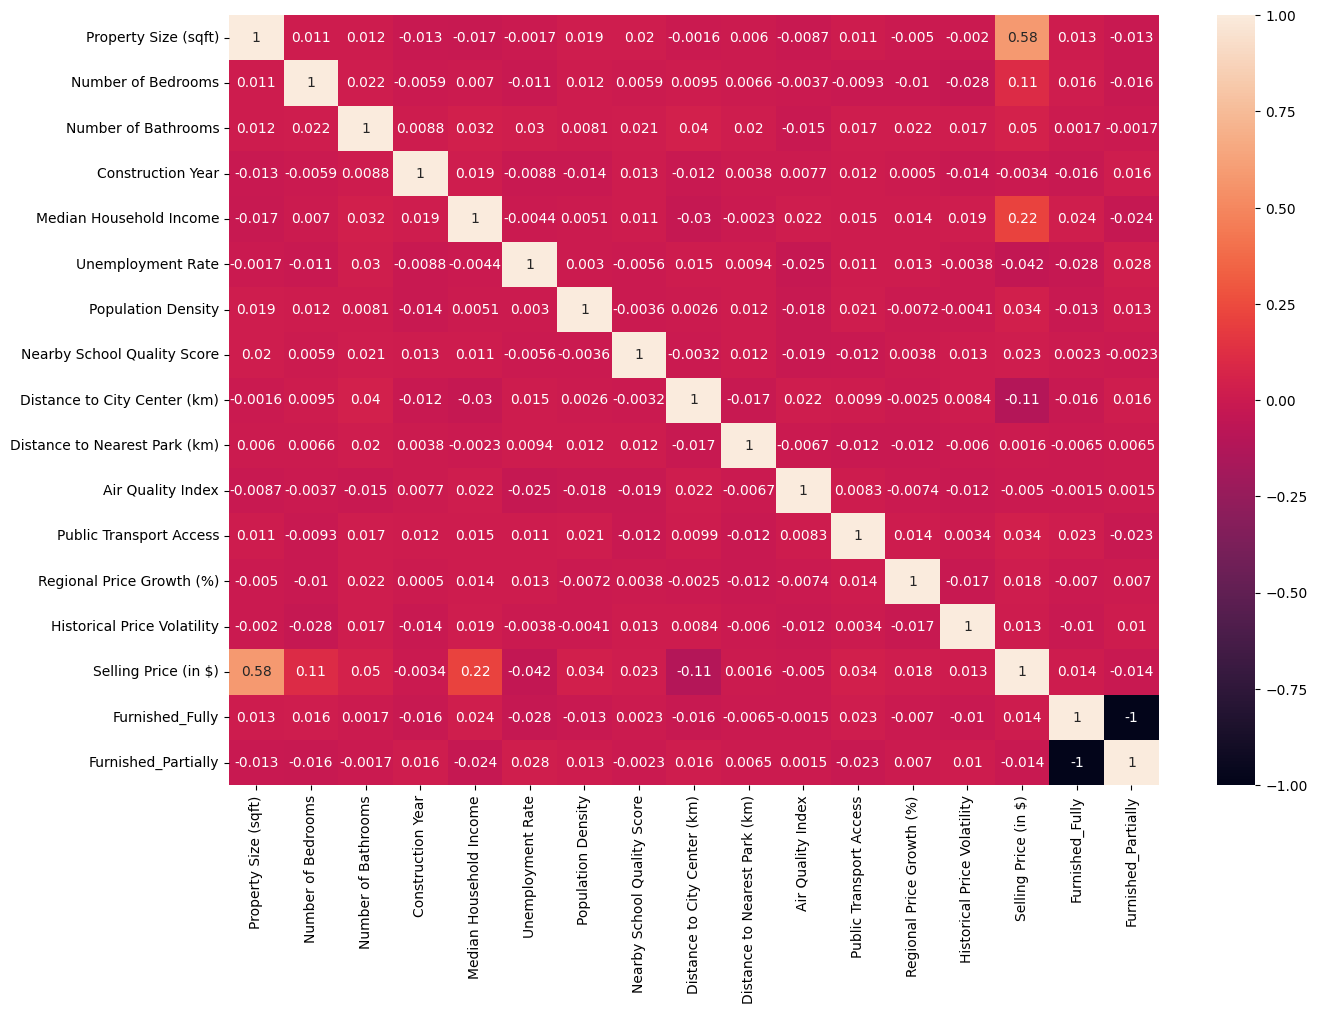

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(final_dataset.corr(),annot=True)

In [17]:
# Since Furnished column is multicollinearity using label encoder for furnished is suitabe
dataset['Furnished'] = le.fit_transform(dataset['Furnished'])
final_dataset = pd.concat([final_dataset.drop(columns=['Furnished_Fully','Furnished_Partially'], axis = 1), dataset['Furnished']], axis=1)
final_dataset.head()

,Property Size (sqft),Number of Bedrooms,Number of Bathrooms,Construction Year,Median Household Income,Unemployment Rate,Population Density,Nearby School Quality Score,Distance to City Center (km),Distance to Nearest Park (km),Air Quality Index,Public Transport Access,Regional Price Growth (%),Historical Price Volatility,Selling Price (in $),Furnished
0,1360,1,3,1962,86.20,7.57,581,0,39.84,9.71,61.0,1,-3.05,4.81,494261.876537,1
1,4272,4,1,1973,68.96,8.57,1831,0,7.30,9.67,156.0,1,13.39,2.24,846778.571205,1
2,3592,3,3,1989,90.29,3.40,8455,3,48.73,7.92,152.0,2,11.31,3.12,709567.908435,1
3,966,2,1,1963,75.21,7.22,856,1,2.18,4.92,115.0,0,6.75,3.57,471644.670280,0
4,4926,1,1,2019,90.89,6.85,1079,2,6.79,1.72,184.0,0,-2.39,5.77,898441.597224,0


In [18]:
final_dataset['Selling Price (in $)'] = np.log1p(final_dataset['Selling Price (in $)'])
final_dataset.head()

,Property Size (sqft),Number of Bedrooms,Number of Bathrooms,Construction Year,Median Household Income,Unemployment Rate,Population Density,Nearby School Quality Score,Distance to City Center (km),Distance to Nearest Park (km),Air Quality Index,Public Transport Access,Regional Price Growth (%),Historical Price Volatility,Selling Price (in $),Furnished
0,1360,1,3,1962,86.20,7.57,581,0,39.84,9.71,61.0,1,-3.05,4.81,13.110823,1
1,4272,4,1,1973,68.96,8.57,1831,0,7.30,9.67,156.0,1,13.39,2.24,13.649196,1
2,3592,3,3,1989,90.29,3.40,8455,3,48.73,7.92,152.0,2,11.31,3.12,13.472413,1
3,966,2,1,1963,75.21,7.22,856,1,2.18,4.92,115.0,0,6.75,3.57,13.063983,0
4,4926,1,1,2019,90.89,6.85,1079,2,6.79,1.72,184.0,0,-2.39,5.77,13.708418,0


<Axes: >

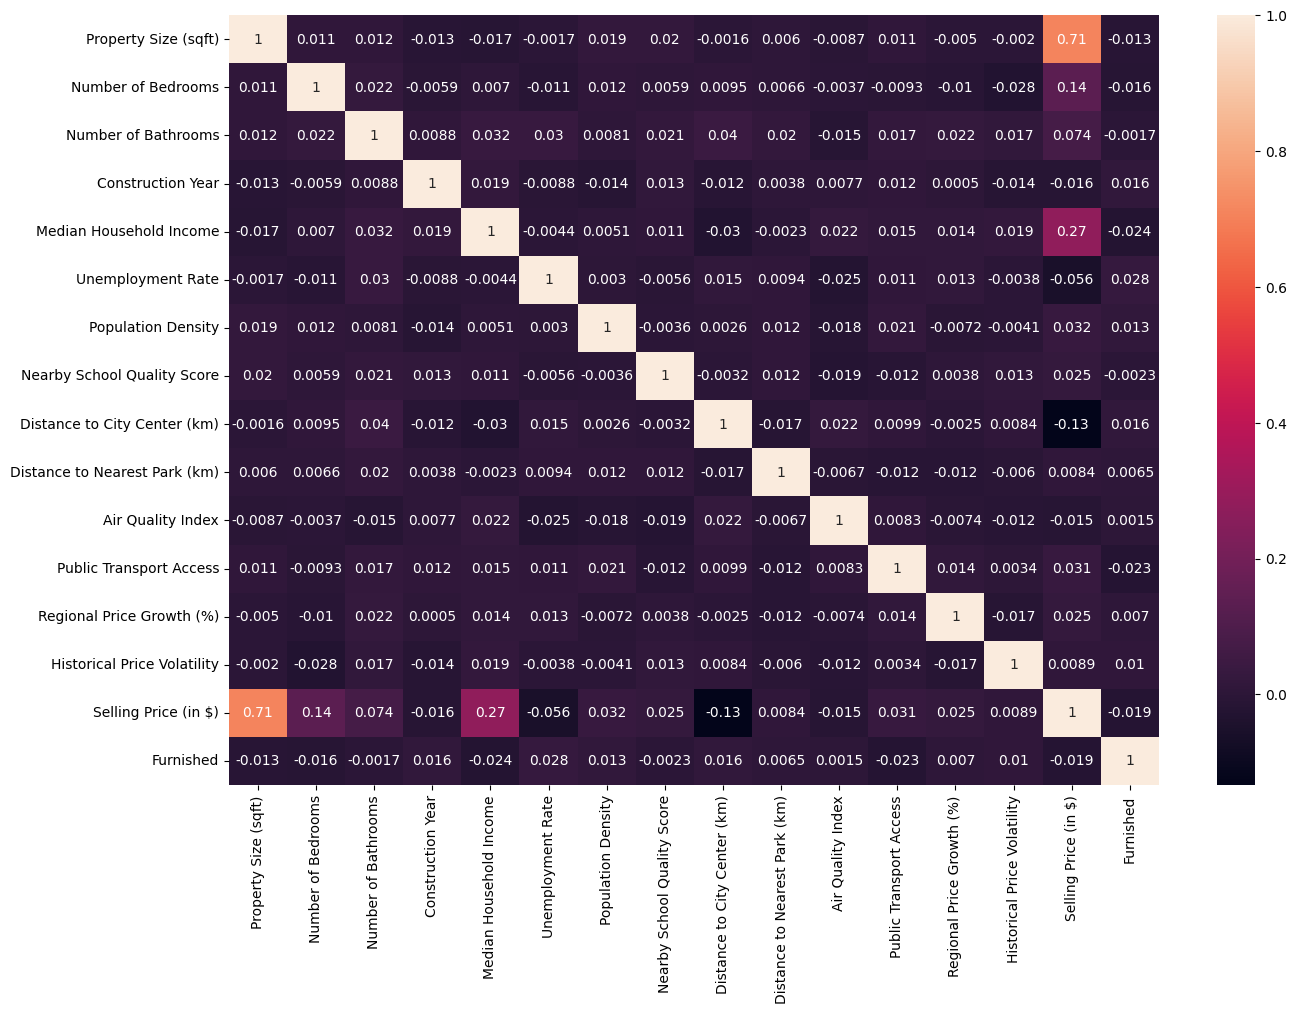

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(final_dataset.corr(),annot=True)

In [20]:
!pip install statsmodels


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Prepare the data: Select numerical columns and drop target variable
features = final_dataset.select_dtypes(include=[np.number]).drop(columns=["Selling Price (in $)"])

# Add a constant for intercept calculation (required for VIF)
features = add_constant(features)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

# Display VIF results
print(vif_data)


                          Feature          VIF
0                           const  8780.470849
1            Property Size (sqft)     1.001926
2              Number of Bedrooms     1.002389
3             Number of Bathrooms     1.006411
4               Construction Year     1.001963
5         Median Household Income     1.004772
6               Unemployment Rate     1.003208
7              Population Density     1.002021
8     Nearby School Quality Score     1.002042
9    Distance to City Center (km)     1.004322
10  Distance to Nearest Park (km)     1.001614
11              Air Quality Index     1.003030
12        Public Transport Access     1.002676
13      Regional Price Growth (%)     1.001835
14    Historical Price Volatility     1.002548
15                      Furnished     1.003275


In [22]:
final_dataset.head()

,Property Size (sqft),Number of Bedrooms,Number of Bathrooms,Construction Year,Median Household Income,Unemployment Rate,Population Density,Nearby School Quality Score,Distance to City Center (km),Distance to Nearest Park (km),Air Quality Index,Public Transport Access,Regional Price Growth (%),Historical Price Volatility,Selling Price (in $),Furnished
0,1360,1,3,1962,86.20,7.57,581,0,39.84,9.71,61.0,1,-3.05,4.81,13.110823,1
1,4272,4,1,1973,68.96,8.57,1831,0,7.30,9.67,156.0,1,13.39,2.24,13.649196,1
2,3592,3,3,1989,90.29,3.40,8455,3,48.73,7.92,152.0,2,11.31,3.12,13.472413,1
3,966,2,1,1963,75.21,7.22,856,1,2.18,4.92,115.0,0,6.75,3.57,13.063983,0
4,4926,1,1,2019,90.89,6.85,1079,2,6.79,1.72,184.0,0,-2.39,5.77,13.708418,0


In [23]:
X, y = final_dataset.drop(columns=['Selling Price (in $)'], axis=1).values, final_dataset['Selling Price (in $)'].values
X,y

(array([[ 1.360e+03,  1.000e+00,  3.000e+00, ..., -3.050e+00,  4.810e+00,
          1.000e+00],
        [ 4.272e+03,  4.000e+00,  1.000e+00, ...,  1.339e+01,  2.240e+00,
          1.000e+00],
        [ 3.592e+03,  3.000e+00,  3.000e+00, ...,  1.131e+01,  3.120e+00,
          1.000e+00],
        ...,
        [ 3.249e+03,  4.000e+00,  3.000e+00, ..., -1.800e+00,  1.010e+00,
          0.000e+00],
        [ 2.548e+03,  1.000e+00,  1.000e+00, ...,  1.590e+00,  9.560e+00,
          1.000e+00],
        [ 4.748e+03,  4.000e+00,  2.000e+00, ...,  1.028e+01,  3.510e+00,
          1.000e+00]], shape=(4999, 15)),
 array([13.11082279, 13.64919569, 13.47241289, ..., 13.49497654,
        13.26822776, 13.78279129], shape=(4999,)))

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)
X_train_scaled, X_test_scaled

(array([[ 1.07655715e+00,  2.00898353e-02,  1.23101751e+00, ...,
          1.56002584e+00,  1.06647326e+00, -1.51279008e+00],
        [-6.03820609e-01, -1.38579684e+00, -1.23313024e+00, ...,
         -1.00452311e+00, -9.29214363e-01,  6.61030246e-01],
        [-7.93290190e-01,  1.42597651e+00, -1.05636514e-03, ...,
          1.29531466e-01,  1.08543201e-01,  6.61030246e-01],
        ...,
        [ 4.23508309e-01, -6.82853501e-01,  1.23101751e+00, ...,
          2.81198339e-01,  6.52130496e-01, -1.51279008e+00],
        [ 8.47485322e-01,  7.23033171e-01, -1.05636514e-03, ...,
         -1.59223224e+00,  1.45420685e+00, -1.51279008e+00],
        [-9.87418859e-01, -1.38579684e+00, -1.23313024e+00, ...,
         -3.87514693e-01, -1.67807238e+00, -1.51279008e+00]],
       shape=(3499, 15)),
 array([[ 0.65490968, -0.6828535 , -1.23313024, ..., -0.03592331,
          1.56824615,  0.66103025],
        [-0.20935115,  1.42597651, -1.23313024, ..., -1.09414444,
         -1.43098725, -1.51279008],


In [25]:
corr_columns = []
for i in final_dataset.columns:
    if i != 'Selling Price (in $)':
        corr_columns.append(i)
len(corr_columns)

15

In [26]:
# checking for correlation after transforming
corr_df = pd.DataFrame(X_train_scaled, columns=corr_columns)
corr_df = pd.concat([corr_df, pd.DataFrame(y_train, columns= ['selling price'])], axis=1)
corr_df

,Property Size (sqft),Number of Bedrooms,Number of Bathrooms,Construction Year,Median Household Income,Unemployment Rate,Population Density,Nearby School Quality Score,Distance to City Center (km),Distance to Nearest Park (km),Air Quality Index,Public Transport Access,Regional Price Growth (%),Historical Price Volatility,Furnished,selling price
0,1.076557,0.020090,1.231018,0.191137,-0.250043,0.750769,-0.943859,0.673402,0.782565,0.890023,-1.603054,-1.119996,1.560026,1.066473,-1.51279,13.593045
1,-0.603821,-1.385797,-1.233130,-0.139666,-1.144390,-0.445892,1.188903,0.673402,-0.104242,-0.938298,-0.732925,1.112976,-1.004523,-0.929214,0.66103,13.079178
2,-0.793290,1.425977,-0.001056,0.805485,-0.770570,-0.319699,0.211207,-0.334828,0.473409,0.426849,0.654579,-0.003510,0.129531,0.108543,0.66103,13.179382
3,0.856803,1.425977,-0.001056,-1.699165,1.215613,1.207676,-0.945302,0.673402,-0.905523,0.085562,0.489960,1.112976,0.605214,-1.332153,-1.51279,14.123603
4,1.584398,0.020090,1.231018,-0.943044,1.827126,-1.076859,1.362307,-1.343059,-1.331752,-1.586046,1.101402,-1.119996,0.713794,-1.400577,0.66103,13.862638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,0.649474,0.020090,1.231018,-1.462877,-0.208429,-1.729583,0.669772,0.673402,1.700218,1.374093,0.254790,1.112976,0.010611,1.062672,0.66103,13.570042
3495,-0.826680,1.425977,1.231018,-0.564984,0.250029,-0.885393,1.449911,0.673402,-0.103541,-1.467640,0.184239,-1.119996,-1.368179,-1.119280,-1.51279,13.340102
3496,0.423508,-0.682854,1.231018,-1.226589,1.162714,-1.237864,1.403405,1.681633,0.407512,-0.868648,-1.344367,1.112976,0.281198,0.652130,-1.51279,13.631336
3497,0.847485,0.723033,-0.001056,1.656121,-0.841102,1.111943,-0.188236,1.681633,1.514444,1.457674,1.430640,-1.119996,-1.592232,1.454207,-1.51279,13.434552


<Axes: >

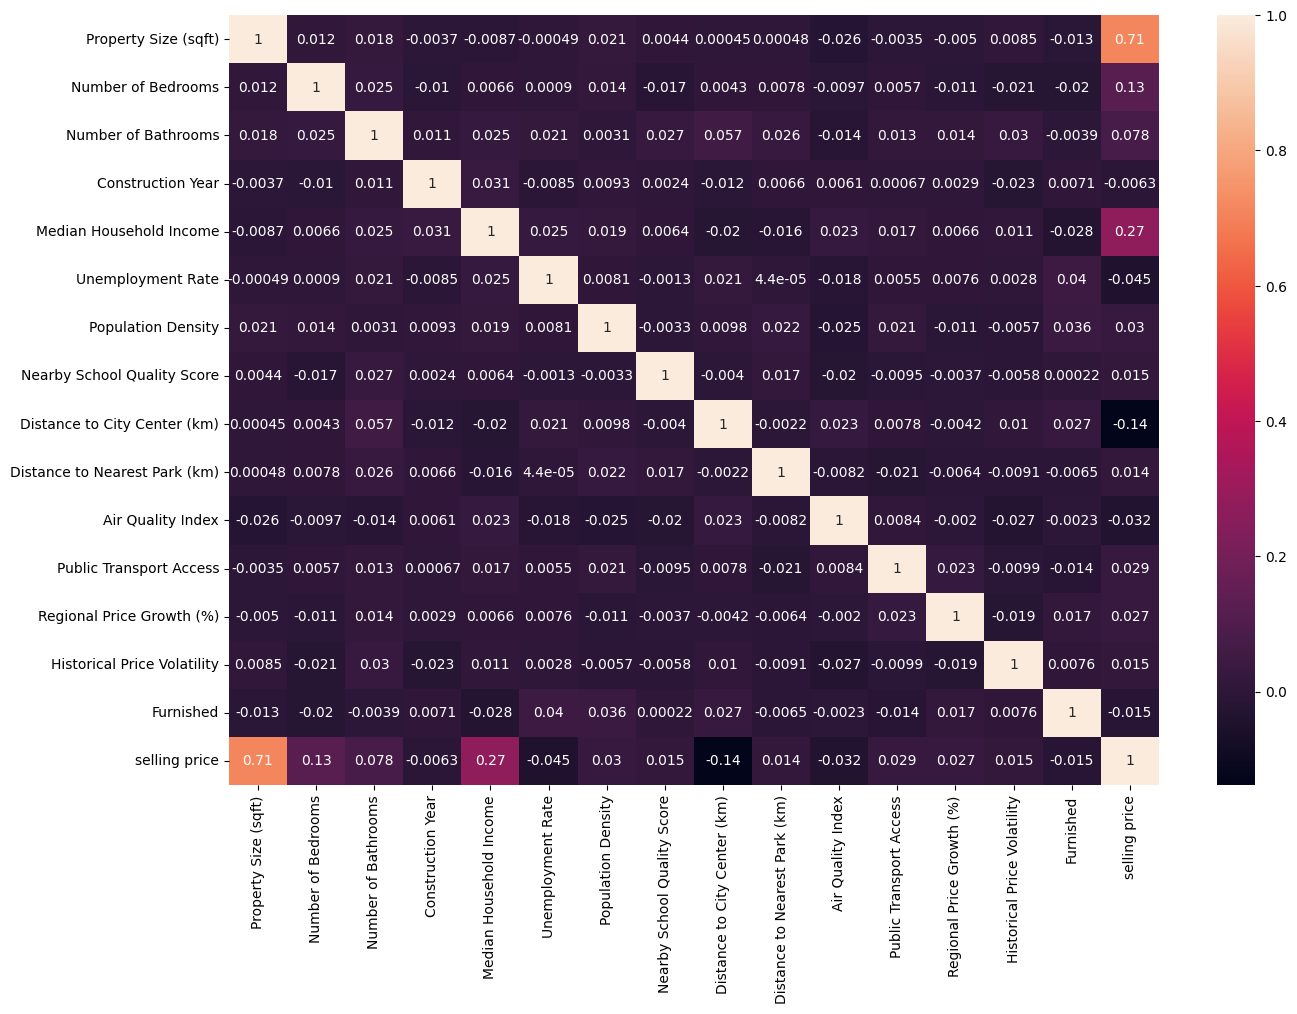

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_df.corr(),annot=True)

In [28]:
# Dropping Construction year which has weak correlation after scaling also
final_dataset_drop_year = final_dataset.drop(columns=['Construction Year'], axis=1)
final_dataset_drop_year.head()

,Property Size (sqft),Number of Bedrooms,Number of Bathrooms,Median Household Income,Unemployment Rate,Population Density,Nearby School Quality Score,Distance to City Center (km),Distance to Nearest Park (km),Air Quality Index,Public Transport Access,Regional Price Growth (%),Historical Price Volatility,Selling Price (in $),Furnished
0,1360,1,3,86.20,7.57,581,0,39.84,9.71,61.0,1,-3.05,4.81,13.110823,1
1,4272,4,1,68.96,8.57,1831,0,7.30,9.67,156.0,1,13.39,2.24,13.649196,1
2,3592,3,3,90.29,3.40,8455,3,48.73,7.92,152.0,2,11.31,3.12,13.472413,1
3,966,2,1,75.21,7.22,856,1,2.18,4.92,115.0,0,6.75,3.57,13.063983,0
4,4926,1,1,90.89,6.85,1079,2,6.79,1.72,184.0,0,-2.39,5.77,13.708418,0


In [29]:
X, y = final_dataset_drop_year.drop(columns=['Selling Price (in $)'], axis=1).values, final_dataset['Selling Price (in $)'].values
X,y

(array([[ 1.360e+03,  1.000e+00,  3.000e+00, ..., -3.050e+00,  4.810e+00,
          1.000e+00],
        [ 4.272e+03,  4.000e+00,  1.000e+00, ...,  1.339e+01,  2.240e+00,
          1.000e+00],
        [ 3.592e+03,  3.000e+00,  3.000e+00, ...,  1.131e+01,  3.120e+00,
          1.000e+00],
        ...,
        [ 3.249e+03,  4.000e+00,  3.000e+00, ..., -1.800e+00,  1.010e+00,
          0.000e+00],
        [ 2.548e+03,  1.000e+00,  1.000e+00, ...,  1.590e+00,  9.560e+00,
          1.000e+00],
        [ 4.748e+03,  4.000e+00,  2.000e+00, ...,  1.028e+01,  3.510e+00,
          1.000e+00]], shape=(4999, 14)),
 array([13.11082279, 13.64919569, 13.47241289, ..., 13.49497654,
        13.26822776, 13.78279129], shape=(4999,)))

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)
X_train_scaled, X_test_scaled

(array([[ 1.07655715e+00,  2.00898353e-02,  1.23101751e+00, ...,
          1.56002584e+00,  1.06647326e+00, -1.51279008e+00],
        [-6.03820609e-01, -1.38579684e+00, -1.23313024e+00, ...,
         -1.00452311e+00, -9.29214363e-01,  6.61030246e-01],
        [-7.93290190e-01,  1.42597651e+00, -1.05636514e-03, ...,
          1.29531466e-01,  1.08543201e-01,  6.61030246e-01],
        ...,
        [ 4.23508309e-01, -6.82853501e-01,  1.23101751e+00, ...,
          2.81198339e-01,  6.52130496e-01, -1.51279008e+00],
        [ 8.47485322e-01,  7.23033171e-01, -1.05636514e-03, ...,
         -1.59223224e+00,  1.45420685e+00, -1.51279008e+00],
        [-9.87418859e-01, -1.38579684e+00, -1.23313024e+00, ...,
         -3.87514693e-01, -1.67807238e+00, -1.51279008e+00]],
       shape=(3499, 14)),
 array([[ 0.65490968, -0.6828535 , -1.23313024, ..., -0.03592331,
          1.56824615,  0.66103025],
        [-0.20935115,  1.42597651, -1.23313024, ..., -1.09414444,
         -1.43098725, -1.51279008],


In [31]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)
y_pred = regressor.predict(X_test_scaled)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_pred=y_pred, y_true=y_test)
print(f"r2 score: {r2}")
mse = mean_squared_error(y_pred=y_pred, y_true=y_test)
print(f"mse: {mse}")

r2 score: 0.6202861057921643
mse: 0.04078371110147822


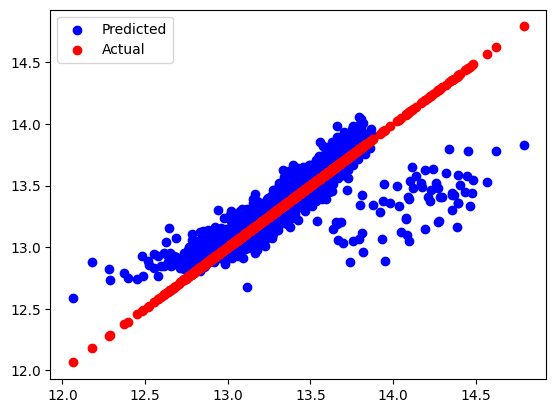

In [33]:
plt.scatter(y_test, y_pred, c='blue', label='Predicted')
plt.scatter(y_test, y_test, c='red', label='Actual')
plt.legend()
plt.show()


In [34]:
X,y

(array([[ 1.360e+03,  1.000e+00,  3.000e+00, ..., -3.050e+00,  4.810e+00,
          1.000e+00],
        [ 4.272e+03,  4.000e+00,  1.000e+00, ...,  1.339e+01,  2.240e+00,
          1.000e+00],
        [ 3.592e+03,  3.000e+00,  3.000e+00, ...,  1.131e+01,  3.120e+00,
          1.000e+00],
        ...,
        [ 3.249e+03,  4.000e+00,  3.000e+00, ..., -1.800e+00,  1.010e+00,
          0.000e+00],
        [ 2.548e+03,  1.000e+00,  1.000e+00, ...,  1.590e+00,  9.560e+00,
          1.000e+00],
        [ 4.748e+03,  4.000e+00,  2.000e+00, ...,  1.028e+01,  3.510e+00,
          1.000e+00]], shape=(4999, 14)),
 array([13.11082279, 13.64919569, 13.47241289, ..., 13.49497654,
        13.26822776, 13.78279129], shape=(4999,)))

In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_poly

array([[1.00000e+00, 1.36000e+03, 1.00000e+00, ..., 2.31361e+01,
        4.81000e+00, 1.00000e+00],
       [1.00000e+00, 4.27200e+03, 4.00000e+00, ..., 5.01760e+00,
        2.24000e+00, 1.00000e+00],
       [1.00000e+00, 3.59200e+03, 3.00000e+00, ..., 9.73440e+00,
        3.12000e+00, 1.00000e+00],
       ...,
       [1.00000e+00, 3.24900e+03, 4.00000e+00, ..., 1.02010e+00,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 2.54800e+03, 1.00000e+00, ..., 9.13936e+01,
        9.56000e+00, 1.00000e+00],
       [1.00000e+00, 4.74800e+03, 4.00000e+00, ..., 1.23201e+01,
        3.51000e+00, 1.00000e+00]], shape=(4999, 120))

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)
poly_scaler = StandardScaler()
X_train_scaled, X_test_scaled = poly_scaler.fit_transform(X_train), poly_scaler.transform(X_test)
X_train_scaled, X_test_scaled, y_train, y_test

(array([[ 0.        ,  1.07655715,  0.02008984, ...,  1.07483189,
         -1.1389999 , -1.51279008],
        [ 0.        , -0.60382061, -1.38579684, ..., -0.94046784,
         -0.23663966,  0.66103025],
        [ 0.        , -0.79329019,  1.42597651, ..., -0.12642241,
          0.57907009,  0.66103025],
        ...,
        [ 0.        ,  0.42350831, -0.6828535 , ...,  0.50224502,
         -1.1389999 , -1.51279008],
        [ 0.        ,  0.84748532,  0.72303317, ...,  1.68382319,
         -1.1389999 , -1.51279008],
        [ 0.        , -0.98741886, -1.38579684, ..., -1.21308114,
         -1.1389999 , -1.51279008]], shape=(3499, 120)),
 array([[ 0.        ,  0.65490968, -0.6828535 , ...,  1.8764025 ,
          1.72644206,  0.66103025],
        [ 0.        , -0.20935115,  1.42597651, ..., -1.15230509,
         -1.1389999 , -1.51279008],
        [ 0.        , -1.55272154, -1.38579684, ..., -0.92592579,
         -1.1389999 , -1.51279008],
        ...,
        [ 0.        ,  0.85602698, 

In [37]:
from sklearn.linear_model import LinearRegression
poly_regressor = LinearRegression()
poly_regressor.fit(X_train_scaled, y_train)
poly_y_pred = poly_regressor.predict(X_test_scaled)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_pred=poly_y_pred, y_true=y_test)
print(f"r2 score: {r2}")
mse = mean_squared_error(y_pred=poly_y_pred, y_true=y_test)
print(f"mse: {mse}")

r2 score: 0.627882029935177
mse: 0.03996786006067376


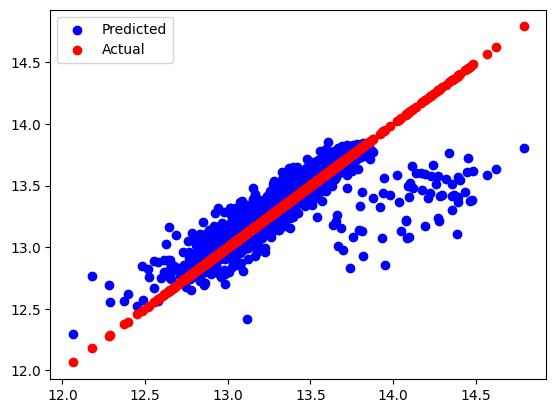

In [39]:
plt.scatter(y_test, poly_y_pred, c='blue', label='Predicted')
plt.scatter(y_test, y_test, c='red', label='Actual')
plt.legend()
plt.show()

In [40]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
ridge_y_pred = ridge.predict(X_test_scaled)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_pred=ridge_y_pred, y_true=y_test)
print(f"r2 score: {r2}")
mse = mean_squared_error(y_pred=ridge_y_pred, y_true=y_test)
print(f"mse: {mse}")

r2 score: 0.6279047739440837
mse: 0.03996541720803474


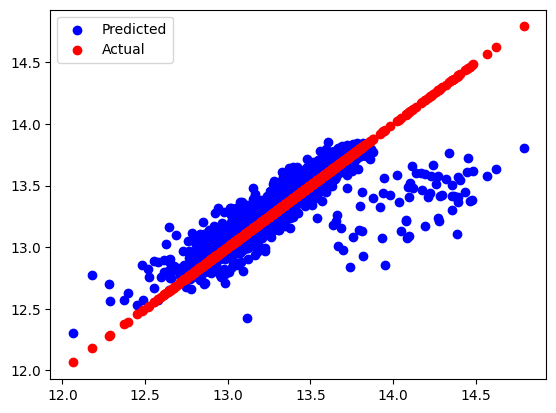

In [42]:
plt.scatter(y_test, ridge_y_pred, c='blue', label='Predicted')
plt.scatter(y_test, y_test, c='red', label='Actual')
plt.legend()
plt.show()

In [43]:
X_train_scaled, X_test_scaled, y_train, y_test

(array([[ 0.        ,  1.07655715,  0.02008984, ...,  1.07483189,
         -1.1389999 , -1.51279008],
        [ 0.        , -0.60382061, -1.38579684, ..., -0.94046784,
         -0.23663966,  0.66103025],
        [ 0.        , -0.79329019,  1.42597651, ..., -0.12642241,
          0.57907009,  0.66103025],
        ...,
        [ 0.        ,  0.42350831, -0.6828535 , ...,  0.50224502,
         -1.1389999 , -1.51279008],
        [ 0.        ,  0.84748532,  0.72303317, ...,  1.68382319,
         -1.1389999 , -1.51279008],
        [ 0.        , -0.98741886, -1.38579684, ..., -1.21308114,
         -1.1389999 , -1.51279008]], shape=(3499, 120)),
 array([[ 0.        ,  0.65490968, -0.6828535 , ...,  1.8764025 ,
          1.72644206,  0.66103025],
        [ 0.        , -0.20935115,  1.42597651, ..., -1.15230509,
         -1.1389999 , -1.51279008],
        [ 0.        , -1.55272154, -1.38579684, ..., -0.92592579,
         -1.1389999 , -1.51279008],
        ...,
        [ 0.        ,  0.85602698, 

In [44]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)
ridgecv_y_pred = ridgecv.predict(X_test_scaled)
r2 = r2_score(y_pred=ridgecv_y_pred, y_true=y_test)
print(f"r2 score: {r2}")
mse = mean_squared_error(y_pred=ridgecv_y_pred, y_true=y_test)
print(f"mse: {mse}")

r2 score: 0.6279047739440837
mse: 0.03996541720803474


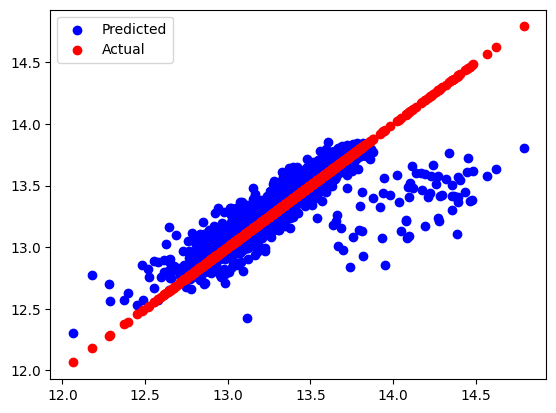

In [45]:
plt.scatter(y_test, ridgecv_y_pred, c='blue', label='Predicted')
plt.scatter(y_test, y_test, c='red', label='Actual')
plt.legend()
plt.show()

In [46]:
final_dataset.head()

,Property Size (sqft),Number of Bedrooms,Number of Bathrooms,Construction Year,Median Household Income,Unemployment Rate,Population Density,Nearby School Quality Score,Distance to City Center (km),Distance to Nearest Park (km),Air Quality Index,Public Transport Access,Regional Price Growth (%),Historical Price Volatility,Selling Price (in $),Furnished
0,1360,1,3,1962,86.20,7.57,581,0,39.84,9.71,61.0,1,-3.05,4.81,13.110823,1
1,4272,4,1,1973,68.96,8.57,1831,0,7.30,9.67,156.0,1,13.39,2.24,13.649196,1
2,3592,3,3,1989,90.29,3.40,8455,3,48.73,7.92,152.0,2,11.31,3.12,13.472413,1
3,966,2,1,1963,75.21,7.22,856,1,2.18,4.92,115.0,0,6.75,3.57,13.063983,0
4,4926,1,1,2019,90.89,6.85,1079,2,6.79,1.72,184.0,0,-2.39,5.77,13.708418,0


In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Property Size (sqft)           4999 non-null   int64  
 1   Number of Bedrooms             4999 non-null   int64  
 2   Number of Bathrooms            4999 non-null   int64  
 3   Construction Year              4999 non-null   int64  
 4   Furnished                      4999 non-null   int64  
 5   Median Household Income        4999 non-null   float64
 6   Unemployment Rate              4999 non-null   float64
 7   Population Density             4999 non-null   int64  
 8   Nearby School Quality Score    4999 non-null   int64  
 9   Distance to City Center (km)   4999 non-null   float64
 10  Distance to Nearest Park (km)  4999 non-null   float64
 11  Air Quality Index              4999 non-null   float64
 12  Public Transport Access        4999 non-null   i

# Lets do this by removing all nan values instead filling with and mean and mode

In [49]:
data = pd.read_csv('Datasets/real_estate_dataset.csv')
data.head()

,Property Size (sqft),Number of Bedrooms,Number of Bathrooms,Construction Year,Furnished,Median Household Income,Unemployment Rate,Population Density,Nearby School Quality Score,Distance to City Center (km),Distance to Nearest Park (km),Air Quality Index,Public Transport Access,Regional Price Growth (%),Historical Price Volatility,Selling Price (in $)
0,1360,1,3,1962,NaN,86.20,7.57,581,Average,39.84,9.71,61.0,Low,-3.05,4.81,494261.876537
1,4272,4,1,1973,NaN,68.96,8.57,1831,Average,7.30,9.67,156.0,Low,13.39,2.24,846778.571205
2,3592,3,3,1989,NaN,90.29,3.40,8455,Poor,48.73,7.92,152.0,Medium,11.31,3.12,709567.908435
3,966,2,1,1963,Fully,75.21,7.22,856,Excellent,2.18,4.92,115.0,High,6.75,3.57,471644.670280
4,4926,1,1,2019,Fully,90.89,6.85,1079,Good,6.79,1.72,184.0,High,-2.39,5.77,898441.597224


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Property Size (sqft)           5000 non-null   int64  
 1   Number of Bedrooms             5000 non-null   int64  
 2   Number of Bathrooms            5000 non-null   int64  
 3   Construction Year              5000 non-null   int64  
 4   Furnished                      3524 non-null   object 
 5   Median Household Income        4750 non-null   float64
 6   Unemployment Rate              5000 non-null   float64
 7   Population Density             5000 non-null   int64  
 8   Nearby School Quality Score    4850 non-null   object 
 9   Distance to City Center (km)   5000 non-null   float64
 10  Distance to Nearest Park (km)  5000 non-null   float64
 11  Air Quality Index              4800 non-null   float64
 12  Public Transport Access        5000 non-null   o

In [52]:
final_data = data.dropna()
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3120 entries, 3 to 4998
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Property Size (sqft)           3120 non-null   int64  
 1   Number of Bedrooms             3120 non-null   int64  
 2   Number of Bathrooms            3120 non-null   int64  
 3   Construction Year              3120 non-null   int64  
 4   Furnished                      3120 non-null   object 
 5   Median Household Income        3120 non-null   float64
 6   Unemployment Rate              3120 non-null   float64
 7   Population Density             3120 non-null   int64  
 8   Nearby School Quality Score    3120 non-null   object 
 9   Distance to City Center (km)   3120 non-null   float64
 10  Distance to Nearest Park (km)  3120 non-null   float64
 11  Air Quality Index              3120 non-null   float64
 12  Public Transport Access        3120 non-null   object

In [53]:
Categorical_features = ['Furnished', 'Nearby School Quality Score', 'Public Transport Access']
non_missing_le = LabelEncoder()
encoded_final_data = final_data
for f in Categorical_features:
    encoded_final_data[f] = non_missing_le.fit_transform(final_data[f])
encoded_final_data.head()

C:\Users\bvkir\AppData\Local\Temp\ipykernel_20828\2027156048.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_final_data[f] = non_missing_le.fit_transform(final_data[f])
C:\Users\bvkir\AppData\Local\Temp\ipykernel_20828\2027156048.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_final_data[f] = non_missing_le.fit_transform(final_data[f])
C:\Users\bvkir\AppData\Local\Temp\ipykernel_20828\2027156048.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,Property Size (sqft),Number of Bedrooms,Number of Bathrooms,Construction Year,Furnished,Median Household Income,Unemployment Rate,Population Density,Nearby School Quality Score,Distance to City Center (km),Distance to Nearest Park (km),Air Quality Index,Public Transport Access,Regional Price Growth (%),Historical Price Volatility,Selling Price (in $)
3,966,2,1,1963,0,75.21,7.22,856,1,2.18,4.92,115.0,0,6.75,3.57,471644.670280
4,4926,1,1,2019,0,90.89,6.85,1079,2,6.79,1.72,184.0,0,-2.39,5.77,898441.597224
5,3944,2,2,2011,1,90.40,3.23,1145,2,16.25,0.54,174.0,0,11.25,9.21,823551.814279
6,3671,5,2,2010,0,93.54,5.32,6763,0,25.95,2.39,106.0,2,8.81,4.47,858114.879038
9,2185,1,1,1981,1,71.54,7.32,1534,2,18.52,2.33,188.0,2,8.29,8.02,554219.760984


In [54]:
encoded_final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3120 entries, 3 to 4998
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Property Size (sqft)           3120 non-null   int64  
 1   Number of Bedrooms             3120 non-null   int64  
 2   Number of Bathrooms            3120 non-null   int64  
 3   Construction Year              3120 non-null   int64  
 4   Furnished                      3120 non-null   int64  
 5   Median Household Income        3120 non-null   float64
 6   Unemployment Rate              3120 non-null   float64
 7   Population Density             3120 non-null   int64  
 8   Nearby School Quality Score    3120 non-null   int64  
 9   Distance to City Center (km)   3120 non-null   float64
 10  Distance to Nearest Park (km)  3120 non-null   float64
 11  Air Quality Index              3120 non-null   float64
 12  Public Transport Access        3120 non-null   int64 

In [56]:
X, y = encoded_final_data.drop(columns=['Selling Price (in $)'], axis=1).values, np.log1p(encoded_final_data['Selling Price (in $)']).values
X, y

(array([[ 9.660e+02,  2.000e+00,  1.000e+00, ...,  0.000e+00,  6.750e+00,
          3.570e+00],
        [ 4.926e+03,  1.000e+00,  1.000e+00, ...,  0.000e+00, -2.390e+00,
          5.770e+00],
        [ 3.944e+03,  2.000e+00,  2.000e+00, ...,  0.000e+00,  1.125e+01,
          9.210e+00],
        ...,
        [ 3.249e+03,  4.000e+00,  3.000e+00, ...,  0.000e+00, -1.800e+00,
          1.010e+00],
        [ 2.548e+03,  1.000e+00,  1.000e+00, ...,  0.000e+00,  1.590e+00,
          9.560e+00],
        [ 4.748e+03,  4.000e+00,  2.000e+00, ...,  2.000e+00,  1.028e+01,
          3.510e+00]], shape=(3120, 15)),
 array([13.06398328, 13.7084181 , 13.62138296, ..., 13.49497654,
        13.26822776, 13.78279129], shape=(3120,)))

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler2 = StandardScaler()
X_train_scaled, X_test_scaled = scaler2.fit_transform(X_train), scaler2.transform(X_test)
X_train_scaled, X_test_scaled

(array([[ 1.43632017e+00, -7.06621367e-01, -1.14051929e-03, ...,
         -1.14300953e+00,  1.19983788e+00, -3.08957806e-01],
        [-1.40720143e+00,  6.90627221e-01, -1.24658758e+00, ...,
         -1.14300953e+00,  6.76323712e-01,  1.29332296e+00],
        [-3.74047423e-01,  1.38925152e+00, -1.14051929e-03, ...,
         -2.20697843e-02, -1.26017044e+00, -2.74376207e-01],
        ...,
        [-3.23955107e-01, -7.06621367e-01, -1.24658758e+00, ...,
          1.09886996e+00,  1.66405432e+00,  1.63657383e-01],
        [ 1.09271819e+00, -7.99707297e-03,  1.24430654e+00, ...,
          1.09886996e+00,  1.48785538e+00,  1.56229095e+00],
        [-3.70133960e-01, -7.99707297e-03, -1.14051929e-03, ...,
          1.09886996e+00, -8.62028597e-01, -1.28108498e+00]],
       shape=(2184, 15)),
 array([[ 5.22135411e-01, -7.99707297e-03, -1.24658758e+00, ...,
          1.09886996e+00, -5.04969278e-02,  1.52130183e-01],
        [-1.46981683e+00,  6.90627221e-01,  1.24430654e+00, ...,
          1.0

In [58]:
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)
y_pred2 = regressor.predict(X_test_scaled)
r2 = r2_score(y_pred=y_pred2, y_true=y_test)
print(f"r2 score: {r2}")
mse = mean_squared_error(y_pred=y_pred2, y_true=y_test)
print(f"mse: {mse}")

r2 score: 0.6550720680262694
mse: 0.03806457523163404


In [ ]:
encoded_final_data.head()

,Property Size (sqft),Number of Bedrooms,Number of Bathrooms,Construction Year,Furnished,Median Household Income,Unemployment Rate,Population Density,Nearby School Quality Score,Distance to City Center (km),Distance to Nearest Park (km),Air Quality Index,Public Transport Access,Regional Price Growth (%),Historical Price Volatility,Selling Price (in $)
3,966,2,1,1963,0,75.21,7.22,856,1,2.18,4.92,115.0,0,6.75,3.57,471644.670280
4,4926,1,1,2019,0,90.89,6.85,1079,2,6.79,1.72,184.0,0,-2.39,5.77,898441.597224
5,3944,2,2,2011,1,90.40,3.23,1145,2,16.25,0.54,174.0,0,11.25,9.21,823551.814279
6,3671,5,2,2010,0,93.54,5.32,6763,0,25.95,2.39,106.0,2,8.81,4.47,858114.879038
9,2185,1,1,1981,1,71.54,7.32,1534,2,18.52,2.33,188.0,2,8.29,8.02,554219.760984


In [62]:
Q1 = encoded_final_data['Selling Price (in $)'].quantile(0.25)
Q3 = encoded_final_data['Selling Price (in $)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = encoded_final_data[(encoded_final_data['Selling Price (in $)'] < lower_bound) | (encoded_final_data['Selling Price (in $)'] > upper_bound)]
print(f"Number of Outliers: {len(outliers)}")
print(outliers)


Number of Outliers: 108
      Property Size (sqft)  Number of Bedrooms  Number of Bathrooms  \
16                    3404                   2                    1   
81                    4974                   3                    1   
131                   4913                   2                    2   
140                   2353                   3                    1   
239                   3936                   5                    2   
...                    ...                 ...                  ...   
4824                  4089                   2                    3   
4861                  2189                   5                    2   
4890                  2976                   4                    2   
4908                  4630                   5                    1   
4991                  4235                   2                    2   

      Construction Year  Furnished  Median Household Income  \
16                 1972          0                    72.68 

In [63]:
filtered_dataset = encoded_final_data[(encoded_final_data['Selling Price (in $)'] >= lower_bound) & (encoded_final_data['Selling Price (in $)'] <= upper_bound)]
filtered_dataset.head()

,Property Size (sqft),Number of Bedrooms,Number of Bathrooms,Construction Year,Furnished,Median Household Income,Unemployment Rate,Population Density,Nearby School Quality Score,Distance to City Center (km),Distance to Nearest Park (km),Air Quality Index,Public Transport Access,Regional Price Growth (%),Historical Price Volatility,Selling Price (in $)
3,966,2,1,1963,0,75.21,7.22,856,1,2.18,4.92,115.0,0,6.75,3.57,471644.670280
4,4926,1,1,2019,0,90.89,6.85,1079,2,6.79,1.72,184.0,0,-2.39,5.77,898441.597224
5,3944,2,2,2011,1,90.40,3.23,1145,2,16.25,0.54,174.0,0,11.25,9.21,823551.814279
6,3671,5,2,2010,0,93.54,5.32,6763,0,25.95,2.39,106.0,2,8.81,4.47,858114.879038
9,2185,1,1,1981,1,71.54,7.32,1534,2,18.52,2.33,188.0,2,8.29,8.02,554219.760984


In [64]:
X, y = filtered_dataset.drop(columns=['Selling Price (in $)'], axis=1).values, np.log1p(filtered_dataset['Selling Price (in $)']).values
X, y

(array([[ 9.660e+02,  2.000e+00,  1.000e+00, ...,  0.000e+00,  6.750e+00,
          3.570e+00],
        [ 4.926e+03,  1.000e+00,  1.000e+00, ...,  0.000e+00, -2.390e+00,
          5.770e+00],
        [ 3.944e+03,  2.000e+00,  2.000e+00, ...,  0.000e+00,  1.125e+01,
          9.210e+00],
        ...,
        [ 3.249e+03,  4.000e+00,  3.000e+00, ...,  0.000e+00, -1.800e+00,
          1.010e+00],
        [ 2.548e+03,  1.000e+00,  1.000e+00, ...,  0.000e+00,  1.590e+00,
          9.560e+00],
        [ 4.748e+03,  4.000e+00,  2.000e+00, ...,  2.000e+00,  1.028e+01,
          3.510e+00]], shape=(3012, 15)),
 array([13.06398328, 13.7084181 , 13.62138296, ..., 13.49497654,
        13.26822776, 13.78279129], shape=(3012,)))

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler3 = StandardScaler()
X_train_scaled, X_test_scaled = scaler3.fit_transform(X_train), scaler2.transform(X_test)
X_train_scaled, X_test_scaled

(array([[-1.2452604 ,  0.72487893,  1.25956604, ...,  1.12824947,
          0.87005857,  1.17467979],
        [ 0.02436773, -1.37697083,  0.02632628, ..., -1.12824947,
          0.73110669, -0.5298428 ],
        [-1.61155898,  1.42549551, -1.20691349, ...,  1.12824947,
         -0.27036356,  1.22469964],
        ...,
        [-1.28561533,  0.02426234,  1.25956604, ...,  1.12824947,
          0.78533182, -1.51869677],
        [ 0.25873673, -1.37697083, -1.20691349, ...,  1.12824947,
          1.54109448, -0.10275024],
        [-1.18084773,  0.02426234,  0.02632628, ...,  0.        ,
         -0.79058584,  0.31279929]], shape=(2108, 15)),
 array([[-9.54805206e-01, -7.06621367e-01, -1.14051929e-03, ...,
          1.09886996e+00,  1.46921895e+00,  8.55289367e-01],
        [ 1.61947020e+00, -1.40524566e+00, -1.14051929e-03, ...,
         -1.14300953e+00, -1.33810459e+00, -1.56926498e+00],
        [ 8.32081613e-01, -7.06621367e-01, -1.24658758e+00, ...,
         -1.14300953e+00, -5.04548050e

In [68]:
regressor_out_outliers = LinearRegression()
regressor_out_outliers.fit(X_train_scaled, y_train)
y_pred3 = regressor_out_outliers.predict(X_test_scaled)
r2 = r2_score(y_pred=y_pred3, y_true=y_test)
print(f"r2 score: {r2}")
mse = mean_squared_error(y_pred=y_pred3, y_true=y_test)
print(f"mse: {mse}")

r2 score: 0.8094614938234336
mse: 0.01624301618197167


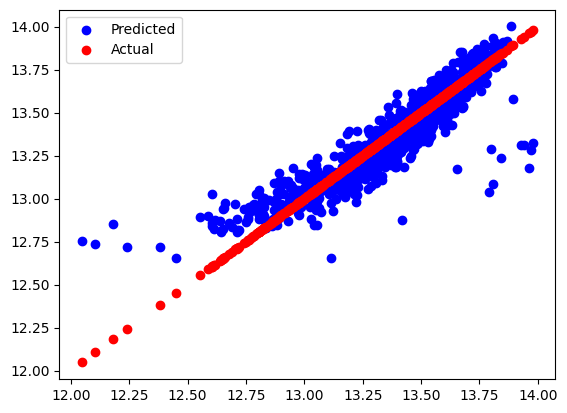

In [69]:
plt.scatter(y_test, y_pred3, c='blue', label='Predicted')
plt.scatter(y_test, y_test, c='red', label='Actual')
plt.legend()
plt.show()